# <center>CROP RECOMMENDATION

# ![image](https://www.day1tech.com/wp-content/uploads/2021/06/Image-Crop-Recommendation@1x-1.png)

### About the dataset:

The given dataset has 2200 rows × 8 columns. Here, we are analyzing different factors like Nitrogen content, Phosphorus content,pH_Value, and Potassium content of the soil along with Temperature, Humidity, and Rainfall received in that place and try to find out whether these factors are affecting the choice of the crop.



In modern agriculture, the need for precise and efficient crop recommendation systems has never been more critical. With the world's population burgeoning and agricultural resources facing mounting pressures, optimizing crop selection has become paramount for farmers striving to maximize yields, conserve resources, and ensure sustainable practices. Traditional farming methods often rely on historical knowledge and local expertise, but these approaches may fall short in adapting to dynamic environmental conditions, changing market demands, and evolving agronomic research. Crop recommendation systems address these challenges by harnessing the power of data analytics, machine learning, and agronomic science to provide tailored guidance to farmers. By analyzing a myriad of factors such as soil health, climate patterns, crop suitability, and market trends, these systems offer personalized recommendations that empower farmers to make informed decisions, boost productivity, and mitigate risks. In essence, crop recommendation systems serve as invaluable tools in modern agriculture, bridging the gap between traditional wisdom and cutting-edge technology to foster a more sustainable and resilient food production system for the future.

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, roc_curve
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df=pd.read_csv('Crop_Recommendation.csv')
df

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee


In [3]:
df.duplicated().sum()

0

In [4]:
df.isnull().mean()*100

Nitrogen       0.0
Phosphorus     0.0
Potassium      0.0
Temperature    0.0
Humidity       0.0
pH_Value       0.0
Rainfall       0.0
Crop           0.0
dtype: float64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Nitrogen,2200.0,50.551818,36.917334,0.000000,21.000000,37.000000,84.250000,140.000000
Phosphorus,2200.0,53.362727,32.985883,5.000000,28.000000,51.000000,68.000000,145.000000
Potassium,2200.0,48.149091,50.647931,5.000000,20.000000,32.000000,49.000000,205.000000
Temperature,2200.0,25.616244,5.063749,8.825675,22.769375,25.598693,28.561654,43.675493
Humidity,2200.0,71.481779,22.263812,14.258040,60.261953,80.473146,89.948771,99.981876
pH_Value,2200.0,6.469480,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091
Rainfall,2200.0,103.463655,54.958389,20.211267,64.551686,94.867624,124.267508,298.560117


pH value varies from 6.5 to 10.
Temperature varies from 8.8 to 43.67
Humidity varies from 14.25 to 99.98
Nitrogen availability varies from 0 to 140
Phosphorous content varies from 5 to 145
Pottassium level varies from 5 to 205
received rainfall varies from 20.21mm to 298.56mm

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


### Visualisation:

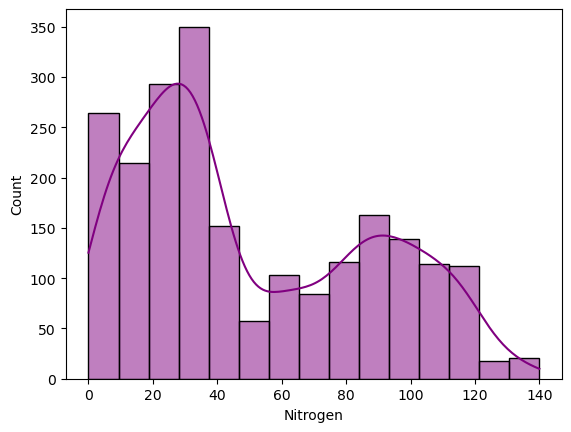

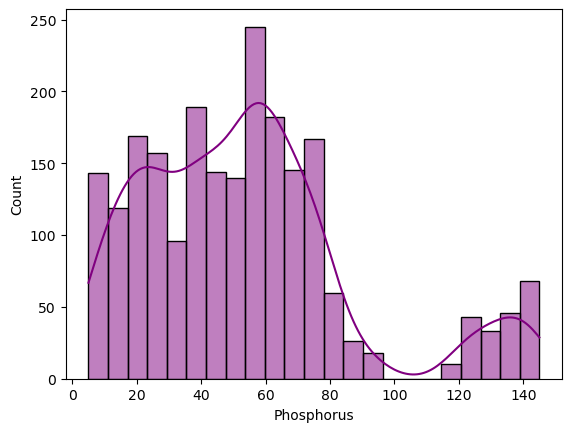

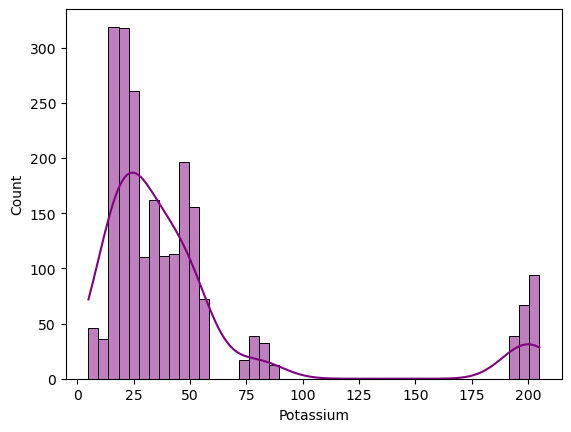

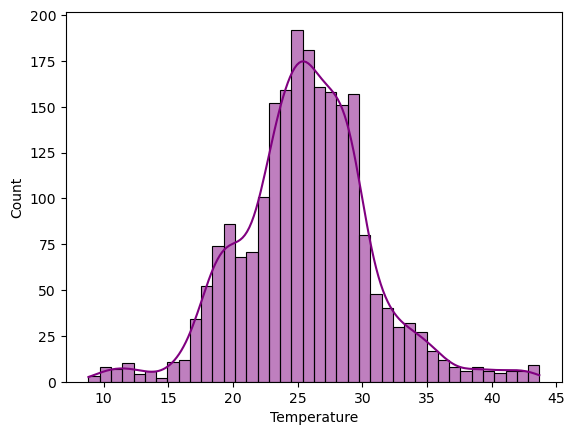

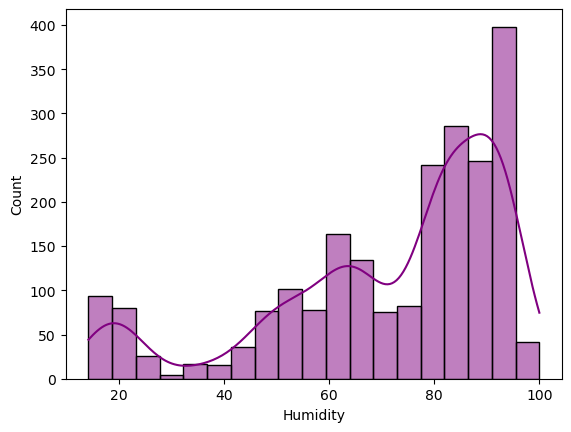

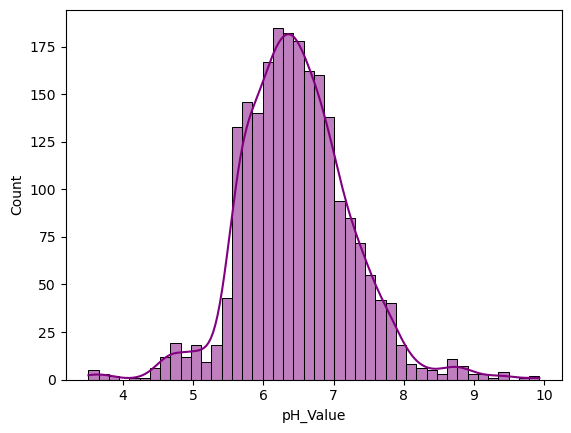

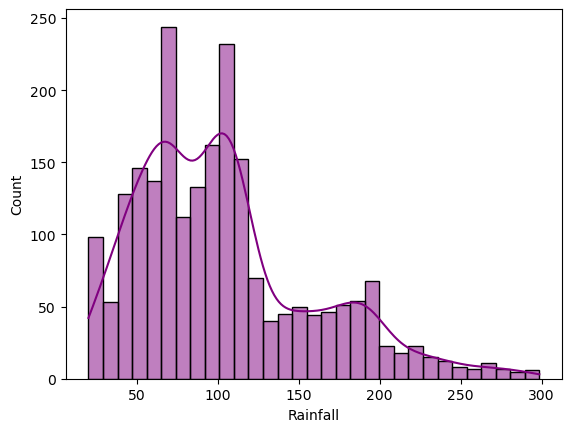

In [7]:
for i in df.columns:
    if df[i].dtypes!='object':
        sns.histplot(x=df[i],color='purple',kde=True)
        plt.show()

In [8]:
df.dropna(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


Text(0.5, 1.0, 'Crop vs Rainfall')

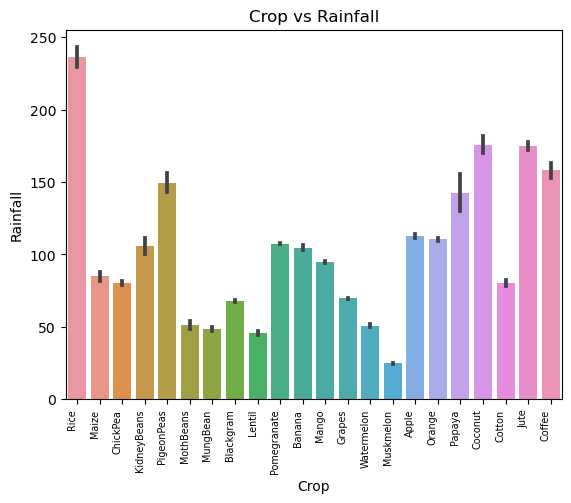

In [10]:
k=sns.barplot(x=df.Crop,y=df.Rainfall)
plt.setp(k.get_xticklabels(),rotation=90,horizontalalignment='right',fontsize='x-small')
plt.title('Crop vs Rainfall')

Rice requires highest amount of rainfall and Muskmelon requires lowest amount of rainfall

Text(0.5, 1.0, 'Crop vs Nitrogen')

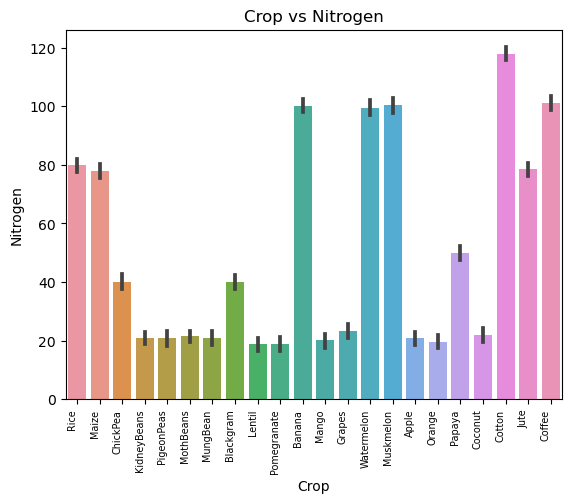

In [11]:
k=sns.barplot(x=df.Crop,y=df.Nitrogen)
plt.setp(k.get_xticklabels(),rotation=90,horizontalalignment='right',fontsize='x-small')
plt.title('Crop vs Nitrogen')

The crop which requires nitrogen the most is cotton and the crops that require nitrogen the least are lentils and pomegranates.


Text(0.5, 1.0, 'Crop vs Phosphorus')

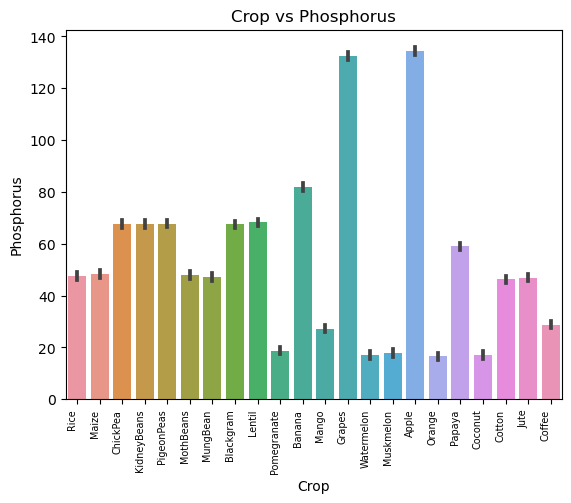

In [12]:
k=sns.barplot(x=df.Crop,y=df.Phosphorus)
plt.setp(k.get_xticklabels(),rotation=90,horizontalalignment='right',fontsize='x-small')
plt.title('Crop vs Phosphorus')

Banana is cultivated in places where a high quantity of phosphorous is available in the soil or is supplied through fertilizers. But fruits like watermelon and orange require only a small amount of phosphorous compared to other crops.

Text(0.5, 1.0, 'Crop vs Temperature')

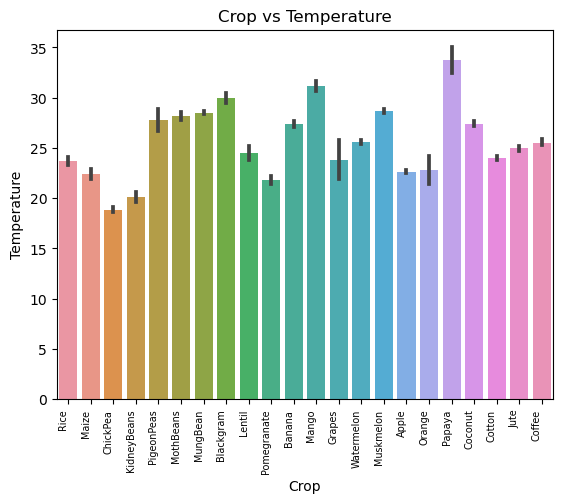

In [13]:
k=sns.barplot(x=df.Crop,y=df.Temperature)
plt.setp(k.get_xticklabels(),rotation=90,horizontalalignment='right',fontsize='x-small')
plt.title('Crop vs Temperature')

The temperature needed for chickpeas to grow is below 20(about 18 degrees Celcius). All other crops require a temperature range of 20 to 30 degrees Celsius. 

Text(0.5, 1.0, 'Crop vs Humidity')

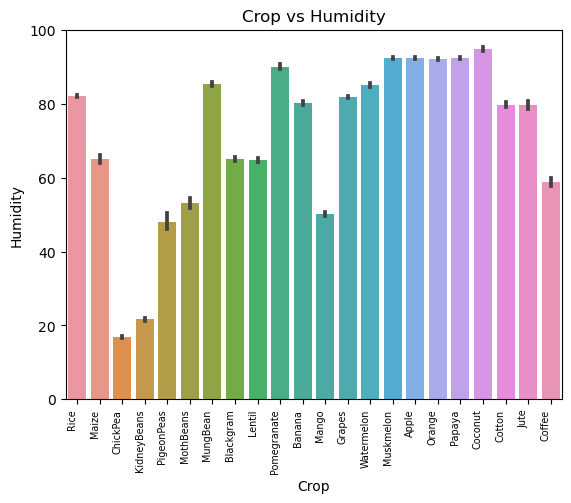

In [14]:
k=sns.barplot(x=df.Crop,y=df.Humidity)
plt.setp(k.get_xticklabels(),rotation=90,horizontalalignment='right',fontsize='x-small')
plt.title('Crop vs Humidity')

Humidity requirement  for chickpea is very low followed by kidneybeans.But crops like coconut,papaya,orange, muskmelon grow in areas of high humidity.


Text(0.5, 1.0, 'Crop vs pH_Value')

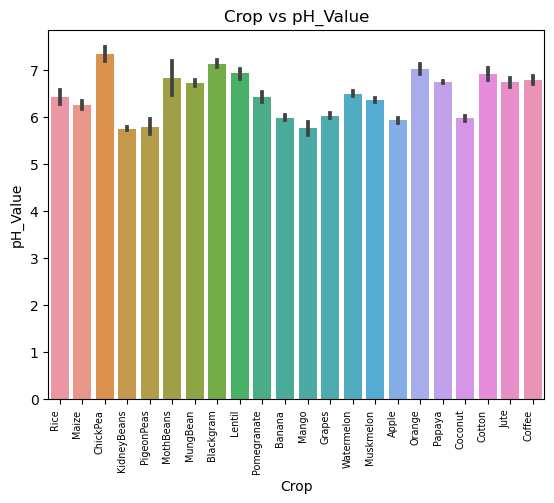

In [15]:
k=sns.barplot(x=df.Crop,y=df.pH_Value)
plt.setp(k.get_xticklabels(),rotation=90,horizontalalignment='right',fontsize='x-small')
plt.title('Crop vs pH_Value')

Highest pH value is required for chickpea cultivation and lowest for Pigeonpea cultivation

Text(0.5, 1.0, 'Crop vs Potassium')

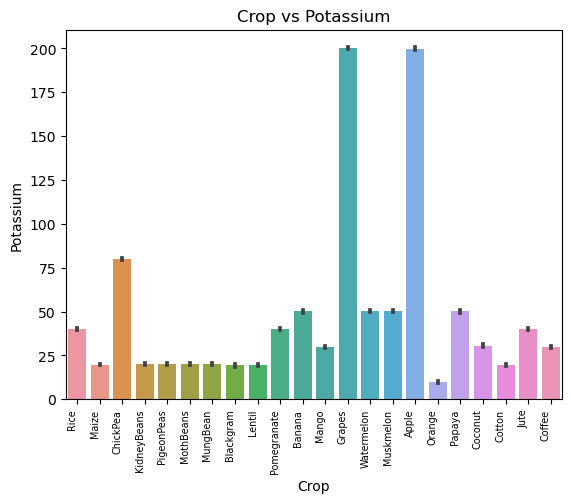

In [16]:
k=sns.barplot(x=df.Crop,y=df.Potassium)
plt.setp(k.get_xticklabels(),rotation=90,horizontalalignment='right',fontsize='x-small')
plt.title('Crop vs Potassium')

Chickpeas require a huge amount of pottassium compared to others for its growth. Orange has the least requirement.

In [17]:
df.Crop.value_counts()

Crop
Rice           100
Maize          100
Jute           100
Cotton         100
Coconut        100
Papaya         100
Orange         100
Apple          100
Muskmelon      100
Watermelon     100
Grapes         100
Mango          100
Banana         100
Pomegranate    100
Lentil         100
Blackgram      100
MungBean       100
MothBeans      100
PigeonPeas     100
KidneyBeans    100
ChickPea       100
Coffee         100
Name: count, dtype: int64

Text(0.5, 1.0, 'Nitrogen vs Potassium')

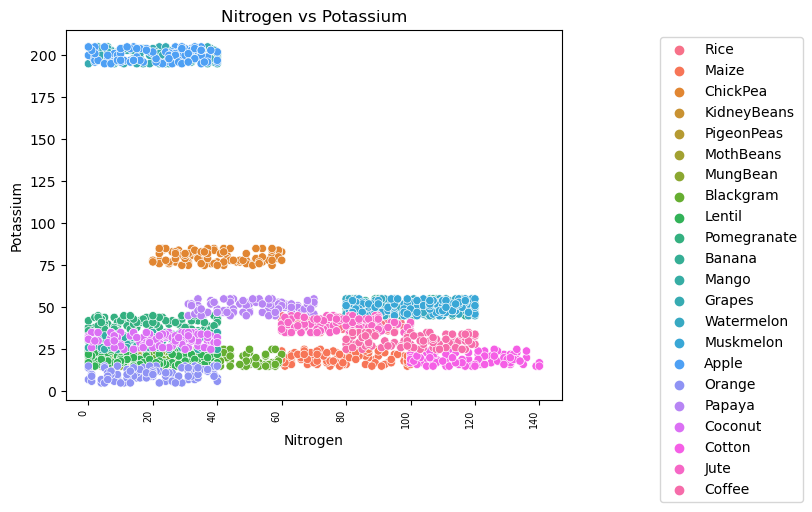

In [18]:
k=sns.scatterplot(x=df.Nitrogen,y=df.Potassium,hue=df.Crop)
plt.setp(k.get_xticklabels(),rotation=90,horizontalalignment='right',fontsize='x-small')
plt.legend(bbox_to_anchor=(1.5,1),loc='best')
plt.title('Nitrogen vs Potassium')

Text(0.5, 1.0, 'Nitrogen vs Phosphorus')

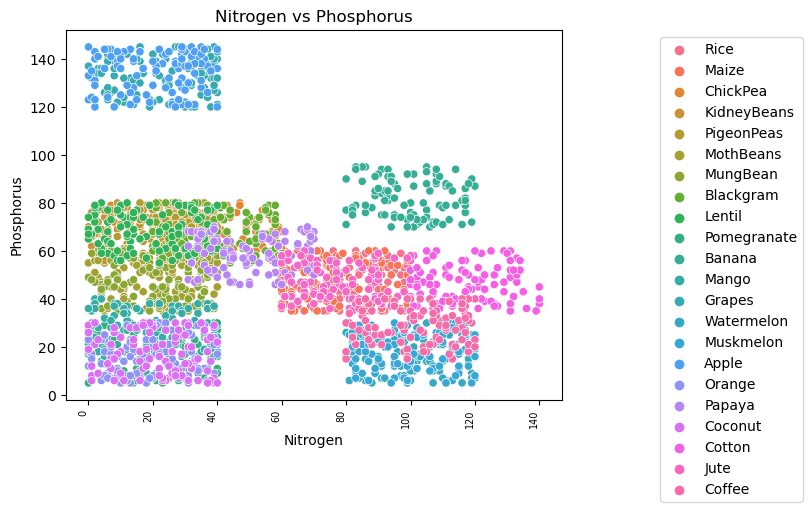

In [19]:
k=sns.scatterplot(x=df.Nitrogen,y=df.Phosphorus,hue=df.Crop)
plt.setp(k.get_xticklabels(),rotation=90,horizontalalignment='right',fontsize='x-small')
plt.legend(bbox_to_anchor=(1.5,1),loc='best')
plt.title('Nitrogen vs Phosphorus')

Text(0.5, 1.0, 'Temperature vs Rainfall')

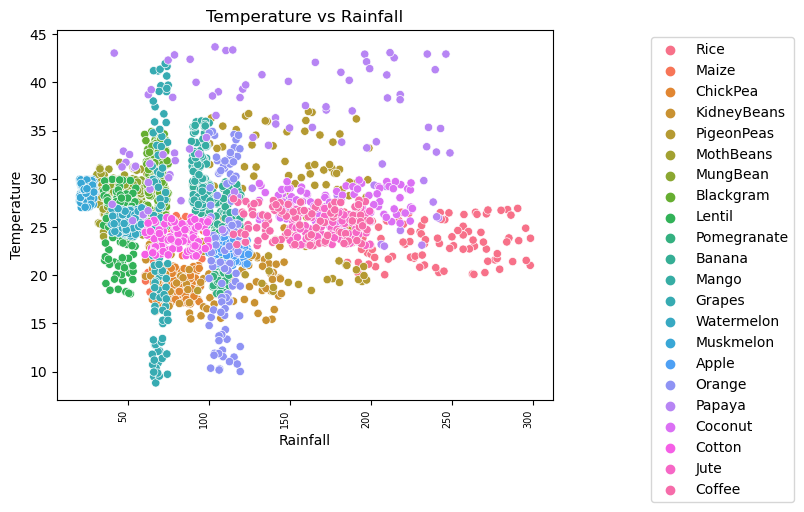

In [20]:
k=sns.scatterplot(x=df.Rainfall,y=df.Temperature,hue=df.Crop)
plt.setp(k.get_xticklabels(),rotation=90,horizontalalignment='right',fontsize='x-small')
plt.legend(bbox_to_anchor=(1.5,1),loc='best')
plt.title('Temperature vs Rainfall')

Crops like papaya requires high rainfall as well as temperature .

Text(0.5, 1.0, 'Temperature vs Humidity')

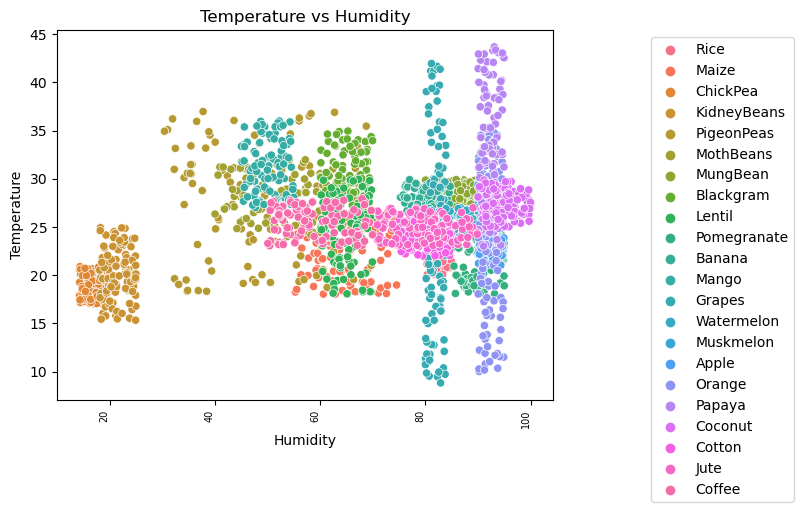

In [21]:
k=sns.scatterplot(x=df.Humidity,y=df.Temperature,hue=df.Crop)
plt.setp(k.get_xticklabels(),rotation=90,horizontalalignment='right',fontsize='x-small')
plt.legend(bbox_to_anchor=(1.5,1),loc='best')
plt.title('Temperature vs Humidity')

Papaya needs high humidity as well

In [22]:
le=LabelEncoder()
df['Crop']=le.fit_transform(df['Crop'])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   int32  
dtypes: float64(4), int32(1), int64(3)
memory usage: 129.0 KB


<Axes: >

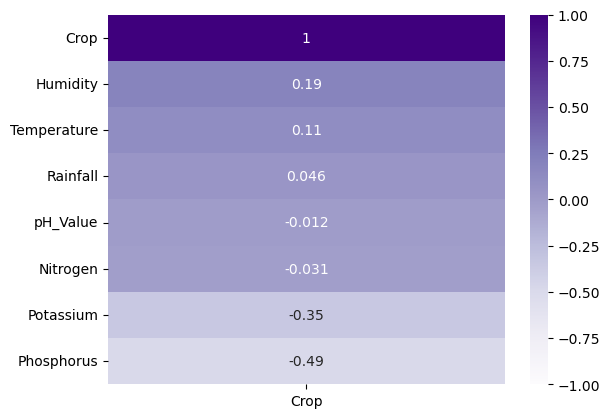

In [24]:
sns.heatmap(df.corr()[['Crop']].sort_values(by='Crop', ascending=False), vmin=-1, vmax=1, annot=True, cmap='Purples')

In [25]:
df.corr()[["Crop"]].sort_values(by="Crop", ascending=False)

,Crop
Crop,1.000000
Humidity,0.193911
Temperature,0.113606
Rainfall,0.045611
pH_Value,-0.012253
Nitrogen,-0.031130
Potassium,-0.346417
Phosphorus,-0.491006


In [30]:
x=df[['Humidity','Temperature','Rainfall']].values
y=df[['Crop']].values

In [31]:
sc=StandardScaler()
x= sc.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=0)

In [32]:
models = {
    "LogisticRegression": LogisticRegression(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "KNeighborsClassifier":KNeighborsClassifier()
}

### Crossvalidation:

In [33]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="accuracy",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    print("Mean Score: ",np.mean(scores))
    print("*"*100)

cross validation model : LogisticRegression
Mean Score:  0.7563636363636363
****************************************************************************************************
cross validation model : DecisionTreeClassifier
Mean Score:  0.9081818181818182
****************************************************************************************************
cross validation model : GradientBoostingClassifier
Mean Score:  0.9136363636363637
****************************************************************************************************
cross validation model : RandomForestClassifier
Mean Score:  0.9245454545454544
****************************************************************************************************
cross validation model : KNeighborsClassifier
Mean Score:  0.8763636363636363
****************************************************************************************************


#### Here we are selecting RandomForestClassifier as it is the model with highest mean score

In [34]:
model = RandomForestClassifier()

In [35]:
model.fit(x_train, y_train)
print("model trained with {}".format(model))
score_train =accuracy_score (y_train, model.predict(x_train))
score_tst = accuracy_score(y_test, model.predict(x_test))
con_train = confusion_matrix(y_train, model.predict(x_train))
con_test = confusion_matrix(y_test, model.predict(x_test))
print("Model accuracy on train is:: ",score_train)
print("Model accuracy on test is:: ", score_tst)
print("confusion_matrix train is:: ", con_train)
print("confusion_matrix test is:: ", con_test)
print("Wrong Predictions made:",(y_test !=model.predict(x_test)).sum(),'/',((y_test == model.predict(x_test)).sum()+(y_test != model.predict(x_test)).sum()))
print("*"*60)

model trained with RandomForestClassifier()
Model accuracy on train is::  1.0
Model accuracy on test is::  0.9136363636363637
confusion_matrix train is::  [[82  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 82  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 78  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 77  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 85  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 83  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 84  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 82  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 79  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 80  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 83  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 82  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 

In [36]:
model.fit(x,y)

RandomForestClassifier()

In [48]:
model.score(x,y)*100

100.0

In [49]:
print('Accuracy:',model.score(x_test,y_test)*100)

Accuracy: 100.0


In [50]:
OUTPUT= pd.DataFrame(zip(y,model.predict(x)), columns=("ACTUAL", "PREDICTION"), dtype = int)

In [51]:
OUTPUT

,ACTUAL,PREDICTION
0,20,20
1,20,20
2,20,20
3,20,20
4,20,20
...,...,...
2195,5,5
2196,5,5
2197,5,5
2198,5,5


In [52]:
expected=y
predicted=model.predict(x)
predicted

array([20, 20, 20, ...,  5,  5,  5])

In [53]:
print(metrics.classification_report(expected,predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00       100
           3       1.00      1.00      1.00       100
           4       1.00      1.00      1.00       100
           5       1.00      1.00      1.00       100
           6       1.00      1.00      1.00       100
           7       1.00      1.00      1.00       100
           8       1.00      1.00      1.00       100
           9       1.00      1.00      1.00       100
          10       1.00      1.00      1.00       100
          11       1.00      1.00      1.00       100
          12       1.00      1.00      1.00       100
          13       1.00      1.00      1.00       100
          14       1.00      1.00      1.00       100
          15       1.00      1.00      1.00       100
          16       1.00      1.00      1.00       100
          17       1.00    

In [54]:
print(metrics.confusion_matrix(expected,predicted))

[[100   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0 100   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0 100   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0 100   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0 100   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0 100   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0   0 100   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0 100   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0   0 100   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 100   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 100   0   0   0   0   0   0 

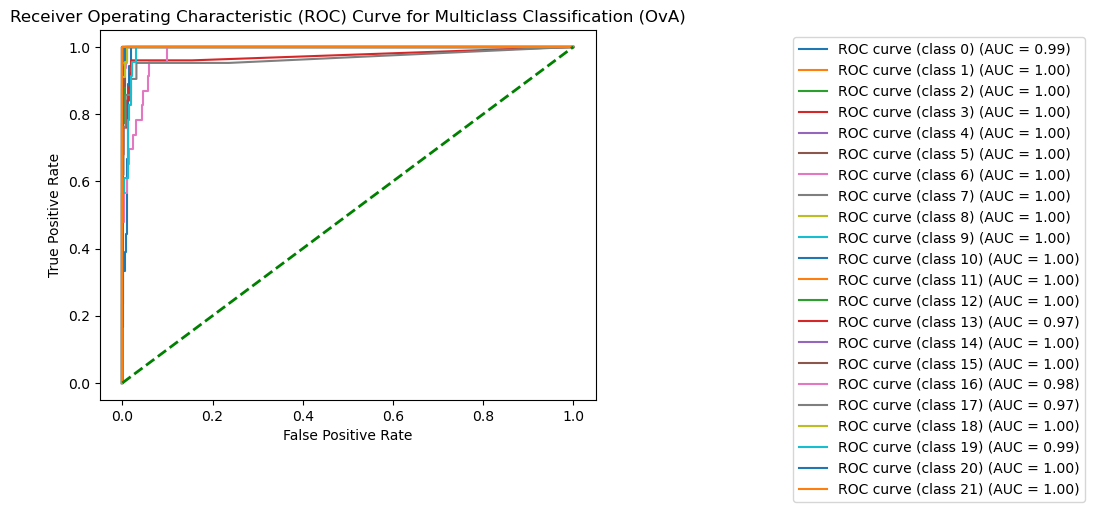

In [55]:
import sklearn.metrics as metrics
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming model is already defined and trained
# Assuming x_train, y_train, x_test, y_test are defined

# Fit the model using OneVsRestClassifier
model_ovr = OneVsRestClassifier(model)
model_ovr.fit(x_train, y_train)

# Compute predicted probabilities
probs = model_ovr.predict_proba(x_test)

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=model_ovr.classes_)

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(model_ovr.classes_)):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test_bin[:, i], probs[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure()
for i in range(len(model_ovr.classes_)):
    plt.plot(fpr[i], tpr[i], label='ROC curve (class {}) (AUC = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', color='green', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass Classification (OvA)')
plt.legend(loc='best',bbox_to_anchor=(2,1))
plt.show()

### Conclusion:

#### In this analysis,RandomForestClassifier, we did extensive analysis of input data and were able to achieve a Test  Accuracy of 100%.